<a href="https://colab.research.google.com/github/kallamjashwanth/anveshan_hackathon/blob/main/spot_the_scam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv('jobs.csv')
print(df.shape)
print(df.columns)
df.head()

(14304, 18)
Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,7531,Contact Center Representatives,"US, VA, Virginia Beach",NaN,NaN,Tidewater Finance Co. was established in 1992 ...,"Tidewater Finance Company, located in Virginia...",The position requires the following qualificat...,Our company offers a competitive salary plus B...,0,1,0,Full-time,Entry level,Unspecified,Financial Services,Customer Service,0
1,130,Customer Service Associate,"US, TX, Dallas",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,QualificationsMinimum of 1 year customer servi...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,0
2,4641,Automated Test Analyst,"NZ, , Auckland",Permanent,NaN,SilverStripe CMS &amp; Framework is an open so...,We are looking for a dedicated and passionate ...,NaN,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Information Technology and Services,NaN,0
3,403,Inside Sales Professional-Omaha,"US, NE, Omaha",NaN,NaN,"ABC Supply Co., Inc. is the nation’s largest w...","As a Sales Representative, you will provide as...","As a Sales Representative, you must have the a...",Your benefits package as a Sales Representativ...,0,1,0,Full-time,NaN,NaN,Building Materials,Sales,0
4,13219,Content Marketing/SEO Manager,"US, CA, Los Angeles",Marketing,NaN,MeUndies is a lifestyle brand that is transfor...,MeUndies is a lifestyle brand that is transfor...,REQUIREMENTS/QUALIFICATIONS/PERSONAL ATTRIBUTE...,"WHY MEUNDIES?We're a fast-growing, VC-backed c...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Marketing,0


In [4]:
df.isnull().sum()
df['fraudulent'].value_counts(normalize=True)

,proportion
fraudulent,
0,0.951552
1,0.048448


In [6]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

def clean_text(text):
    if pd.isnull(text): return ""
    text = re.sub(r'<[^>]+>', ' ', text)  # Remove HTML
    text = re.sub(r'[^\w\s]', ' ', text.lower())  # Remove punctuations
    return text

def preprocess(df):
    df['description'] = df['description'].apply(clean_text)
    df['title'] = df['title'].apply(clean_text)
    df['text'] = df['title'] + ' ' + df['description']

    vectorizer = TfidfVectorizer(max_features=3000)
    X = vectorizer.fit_transform(df['text'])
    y = df['fraudulent']
    return X, y, vectorizer

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from joblib import dump

df = pd.read_csv('jobs.csv')
X, y, vectorizer = preprocess(df)

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Model
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Save
#dump(model, 'model/fraud_model.joblib')
#dump(vectorizer, 'model/vectorizer.joblib')
import os

# Create the folder if it doesn't exist
os.makedirs('model', exist_ok=True)

# Now save the model and vectorizer
dump(model, 'model/fraud_model.joblib')
dump(vectorizer, 'model/vectorizer.joblib')


              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3403
           1       0.99      0.49      0.65       173

    accuracy                           0.97      3576
   macro avg       0.98      0.74      0.82      3576
weighted avg       0.98      0.97      0.97      3576

F1 Score: 0.6511627906976745


['model/vectorizer.joblib']

In [21]:
import pandas as pd
from joblib import load
#from preprocessing import clean_text
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

def predict_on_csv(file_path):
    model = load('model/fraud_model.joblib')
    vectorizer = load('model/vectorizer.joblib')

    df = pd.read_csv(file_path)
    df['text'] = df['title'].fillna('') + ' ' + df['description'].fillna('')
    df['text'] = df['text'].apply(clean_text)

    X = vectorizer.transform(df['text'])
    df['fraud_proba'] = model.predict_proba(X)[:, 1]
    df['prediction'] = model.predict(X)

    return df[['job_id', 'title', 'prediction', 'fraud_proba']]

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Load uploaded files
model = joblib.load("model/fraud_model.joblib")
vectorizer = joblib.load("model/vectorizer.joblib")


In [15]:
# Load the uploaded test CSV
df = pd.read_csv("jobs_test.csv")

# Display basic info
print("Columns:", df.columns.tolist())
df.head()


Columns: ['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,16996,EXCELLENT ER RN Opportunity Available Now,"US, IL, Urbana",NaN,NaN,NaN,"Our client, located in Urban, IL, is looking f...",NaN,NaN,0,1,0,Full-time,NaN,NaN,Hospital & Health Care,Health Care Provider
1,9358,Scrum Master / Website Development Project Man...,"US, FL, Tampa",NaN,NaN,352 Inc. is a full-service digital agency crea...,Other agencies may call this job “Project Mana...,Qualifications2-10 years of experience in webs...,What You’ll GetFreedom: We trust you to do you...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Project Management
2,11562,HR Assistant - Contract,"AU, NSW, Sydney",People & Culture,NaN,Squiz is one of the world's leading web soluti...,Squiz is an Australian owned and now multinati...,You could be a graduate or have many years of ...,NaN,0,1,0,Contract,Not Applicable,Unspecified,Information Technology and Services,Human Resources
3,1106,Regional Sales Director South Africa,"ZA, GT, Johannesburg",Sales,NaN,Upstream’s mission is to revolutionise the way...,The Regional Sales Director SA will help deriv...,Knowledge/Skills/ExperienceProven sales and ac...,"Includes attractive competitive base salary, c...",0,1,1,Full-time,Director,NaN,Telecommunications,Sales
4,1981,Petrophysicist,"US, OK, Oklahoma City",NaN,NaN,Valor Services provides Workforce Solutions th...,About the CompanyThis is an amazing job opport...,"Education: Bachelor’s degree in Geology, Geoph...","Industry, Location and CompensationIndustry: E...",0,1,0,Full-time,Associate,Bachelor's Degree,Oil & Energy,NaN


In [16]:
# Vectorize the text field (adjust field as per your training pipeline)
X_test = vectorizer.transform(df["description"].astype(str))

# Predict probabilities and classes
fraud_prob = model.predict_proba(X_test)[:, 1]
fraud_class = model.predict(X_test)

# Add predictions to dataframe
df["fraud_probability"] = fraud_prob
df["is_fraud"] = fraud_class


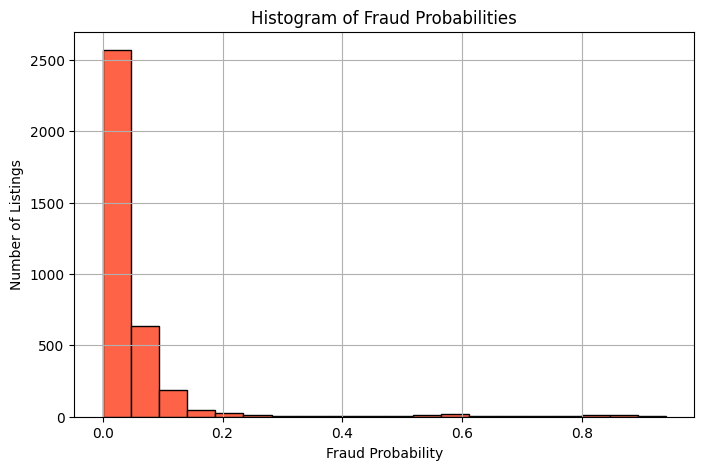

In [17]:
plt.figure(figsize=(8, 5))
plt.hist(df["fraud_probability"], bins=20, color='tomato', edgecolor='black')
plt.title("Histogram of Fraud Probabilities")
plt.xlabel("Fraud Probability")
plt.ylabel("Number of Listings")
plt.grid(True)
plt.show()


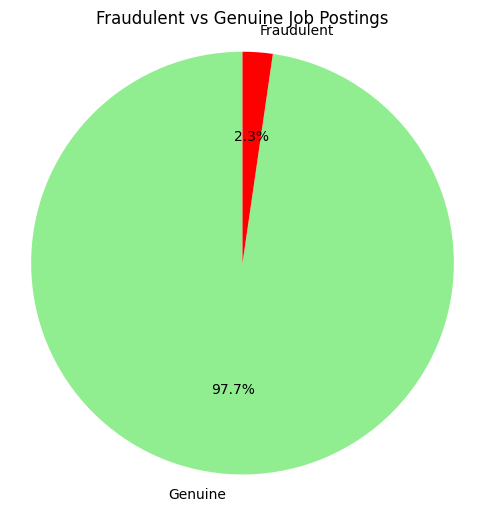

In [18]:
fraud_counts = df["is_fraud"].value_counts()
labels = ["Genuine", "Fraudulent"]
colors = ["lightgreen", "red"]

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Fraudulent vs Genuine Job Postings")
plt.axis("equal")
plt.show()


In [19]:
top_suspects = df.sort_values("fraud_probability", ascending=False).head(10)
top_suspects[["title", "company_profile", "fraud_probability"]]


,title,company_profile,fraud_probability
2794,Principal/Senior Mechanical Engineer (Package ...,Aker Solutions is a global provider of product...,0.94
3327,Executive Chef,Le Meridien is situated in the heart of kuala ...,0.92
2500,Project QA Engineer,Aker Solutions is a global provider of product...,0.92
728,Data Entry Office Support,NaN,0.89
72,Customer Service Agent,NaN,0.89
2752,Admin Clerk Remote Position,NaN,0.89
2693,NICU RN,NaN,0.89
2448,Lawn and Maintenance Contractors,NaN,0.87
600,Mechanical Assembly & Test Technician,Aker Solutions is a global provider of product...,0.87
114,"Part Time Staff Needed, Weekend Cash Job.",NaN,0.86
